In [1]:
import os 
import sys
import pandas as pd
import seaborn as sns
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import fbprophet as pro

%matplotlib inline

# Importing data

## Pageview and revisions

In [2]:
combined_data = pd.read_csv('../data/test15/cleaned/combined.csv')
combined_data.timestamp = pd.to_datetime(combined_data.timestamp)
# In the interest of memory I'm going to immeadiately subset the combined data
combined_data = combined_data[['timestamp', 'revid', 'page_title', 'character_count', 
                               'external_link_count', 'heading_count', 'page_views',
                               'wikifile_count', 'wikilink_count', 'word_count']]

# combined_data = combined_data.reset_index()
# combined_data = combined_data.set_index(['page_title', 'timestamp'])

In [3]:
combined_data.sort_values(by=['page_title', 'timestamp'], inplace=True)

In [4]:
combined_data.head()

,timestamp,revid,page_title,character_count,external_link_count,heading_count,page_views,wikifile_count,wikilink_count,word_count
0,2015-07-01,NaN,'Amran,NaN,NaN,NaN,14.0,NaN,NaN,NaN
1,2015-07-02,NaN,'Amran,NaN,NaN,NaN,12.0,NaN,NaN,NaN
2,2015-07-03,NaN,'Amran,NaN,NaN,NaN,13.0,NaN,NaN,NaN
3,2015-07-04,NaN,'Amran,NaN,NaN,NaN,8.0,NaN,NaN,NaN
4,2015-07-05,NaN,'Amran,NaN,NaN,NaN,13.0,NaN,NaN,NaN


## Category data

In [5]:
category_data = pd.read_csv('../data/test15/cleaned/category_data.csv')

In [6]:
category_data.head()

,Unnamed: 0,page_title,revid,categories
0,0,Aubre de Lambert Maynard,786130355.0,[]
1,1,Nabla,715468992.0,[]
2,2,President-elect of the United States,670644904.0,"['Titles', 'Elections in the United States']"
3,3,Space Oddity,672181778.0,"['1975 singles', 'Song recordings produced by ..."
4,4,Tillakaratne Dilshan,669932370.0,"['Sri Lankan Buddhists', 'People from Western ..."


## Links pointing to pages

In [7]:
pointer_data = pd.read_csv('../data/test15/cleaned/pointers.csv')

In [8]:
pointer_data.head()

,Unnamed: 0,page_title,talk_link_count,wiki_link_count,wikipeida_count,user_count
0,15,'Amran,1,68,0,0
1,16,'Amran Governorate,1,103,0,0
2,17,'Asir Region,9,97,0,0
3,19,'Hours...',10,7,0,0
4,20,+1 button,0,2,0,0


# Figuring out how to cluster data

# Determing wikipedia revision summary data

Instead of knowing specific details of each edit it would be nice to know the number of edits that wikipedia page experinced in a single day

In [9]:
# Generating summary numbers for edits

combined_data.set_index('timestamp', inplace=True)
number_of_edits = combined_data[['revid', 'page_title']].groupby('page_title')['revid'].resample('1d').count()
number_of_edits = number_of_edits.to_frame(name='number_of_edits')

In [10]:
number_of_edits.reset_index(inplace=True)

In [11]:
number_of_edits.set_index(['page_title', 'timestamp'], inplace=True)

In [12]:
combined_data.reset_index(inplace=True)
combined_data.set_index(['page_title', 'timestamp'],inplace=True)

In [13]:
combined_data = pd.concat([combined_data, number_of_edits], sort=False)

In [14]:
combined_data = combined_data.sort_index(level=1).sort_index(level=0)

In [15]:
# Resampling to deal with difficulties in aligning data

combined_data.reset_index(inplace=True)
combined_data.set_index('timestamp', inplace=True)
combined_data = combined_data.groupby('page_title').resample('1d').mean()

# Data analysis 

## Forcasting pageview activity

In [16]:
combined_data.reset_index(inplace=True)

In [17]:
resampled_data = combined_data[['timestamp', 'page_views']]
resampled_data.columns = ['ds', 'y']

In [18]:
resampled_data.set_index('ds', inplace=True)
resampled_data = resampled_data.resample('1D').mean()
resampled_data.reset_index(inplace=True)

In [35]:
m = pro.Prophet()
m.fit(resampled_data);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [36]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

,ds,yhat,yhat_lower,yhat_upper
1464,2019-07-04,1631.817478,1366.281029,1890.507880
1465,2019-07-05,1577.247353,1296.674626,1856.794860
1466,2019-07-06,1485.588467,1220.377751,1750.854538
1467,2019-07-07,1578.095552,1315.165836,1866.457543
1468,2019-07-08,1682.230234,1412.732875,1958.866792


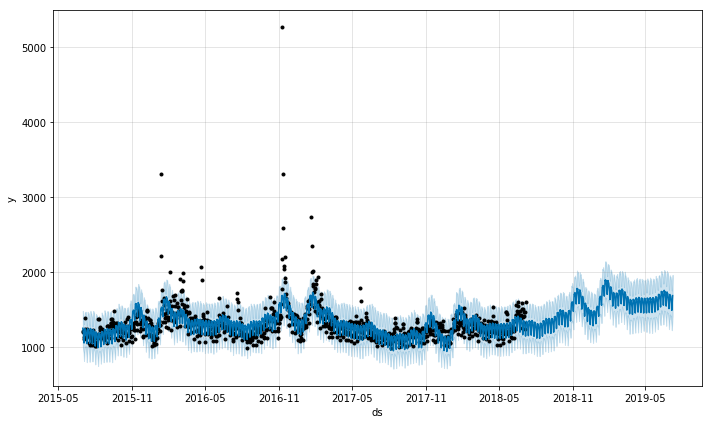

In [37]:
fig1 = m.plot(forecast)

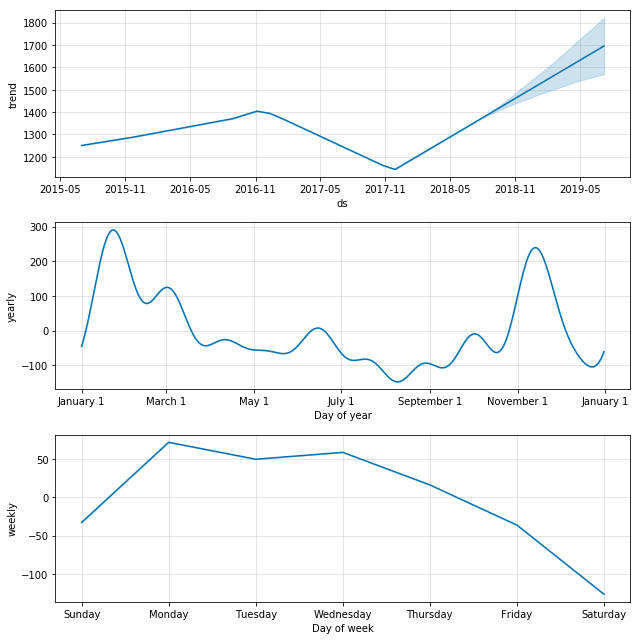

In [38]:
fig2 = m.plot_components(forecast)

# Edit frequency

In [46]:
resampled_data = combined_data[['timestamp', 'number_of_edits']]
resampled_data.columns = ['ds', 'y']

In [47]:
resampled_data.set_index('ds', inplace=True)
resampled_data = resampled_data.resample('1D').mean()
resampled_data.reset_index(inplace=True)

In [ ]:
m = pro.Prophet()
m.fit(resampled_data);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [43]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1464,2019-07-04,0.115675,0.091888,0.140136
1465,2019-07-05,0.106091,0.084051,0.129471
1466,2019-07-06,0.090971,0.067553,0.115975
1467,2019-07-07,0.094904,0.073295,0.117867
1468,2019-07-08,0.110689,0.085482,0.134404


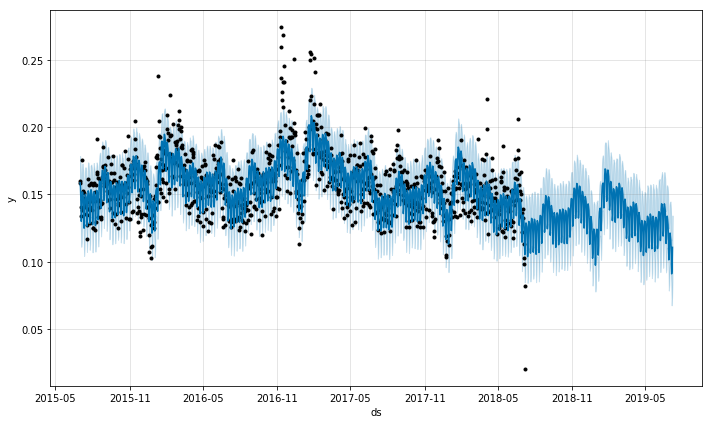

In [44]:
fig1 = m.plot(forecast)

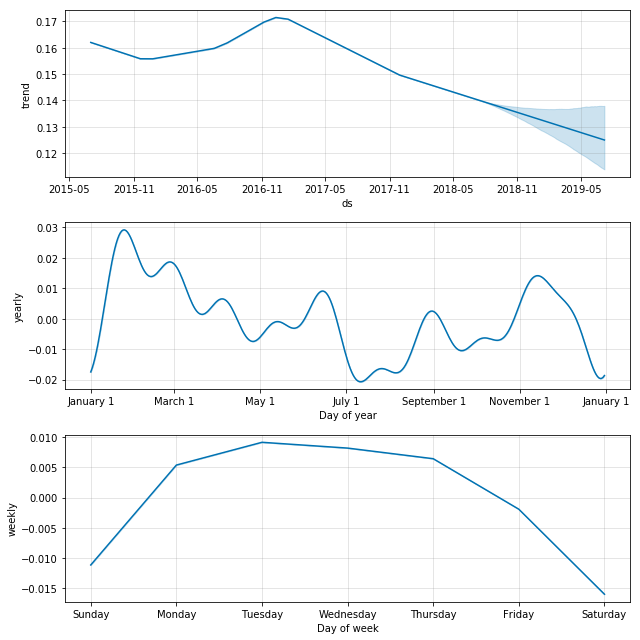

In [45]:
fig2 = m.plot_components(forecast)

In [10]:
# Sorting and aligning the data to be concatendated

combined_data.reset_index(inplace=True)
combined_data.set_index(['page_title', 'timestamp'],inplace=True)
combined_data.sort_index(level=1).sort_index(level=0)
number_of_edits.sort_index(level=1).sort_index(level=0)
pd.concat([combined_data, number_of_edits], sort=False)

number_of_edits       index  character_count comment  \
page_title timestamp                                                          
'Amran     2015-07-01              0.0         NaN              NaN     NaN   
           2015-07-02              0.0         NaN              NaN     NaN   
           2015-07-03              0.0         NaN              NaN     NaN   
           2015-07-04              0.0         NaN              NaN     NaN   
           2015-07-05              0.0         NaN              NaN     NaN   
           2015-07-06              0.0         NaN              NaN     NaN   
           2015-07-07              0.0         NaN              NaN     NaN   
           2015-07-08              0.0         NaN              NaN     NaN   
           2015-07-09              0.0         NaN              NaN     NaN   
           2015-07-10              0.0         NaN              NaN     NaN   
           2015-07-11              0.0         NaN              NaN     NaN   
           2015-07-12              0.0         NaN              NaN     NaN   
           2015-07-13              0.0         NaN              NaN     NaN   
           2015-07-14              0.0         NaN              NaN     NaN   
           2015-07-15              0.0         NaN              NaN     NaN   
           2015-07-16              0.0         NaN              NaN     NaN   
           2015-07-17              0.0         NaN              NaN     NaN   
           2015-07-18              0.0         NaN              NaN     NaN   
           2015-07-19              0.0         NaN              NaN     NaN   
           2015-07-20              0.0         NaN              NaN     NaN   
           2015-07-21              0.0         NaN              NaN     NaN   
           2015-07-22              0.0         NaN              NaN     NaN   
           2015-07-23              0.0         NaN              NaN     NaN   
           2015-07-24              0.0         NaN              NaN     NaN   
           2015-07-25              0.0         NaN              NaN     NaN   
           2015-07-26              0.0         NaN              NaN     NaN   
           2015-07-27              0.0         NaN              NaN     NaN   
           2015-07-28              0.0         NaN              NaN     NaN   
           2015-07-29              0.0         NaN              NaN     NaN   
           2015-07-30              0.0         NaN              NaN     NaN   
...                                ...         ...              ...     ...   
Āryāvarta  2018-06-09              NaN  11146341.0              NaN     NaN   
           2018-06-10              NaN  11146342.0              NaN     NaN   
           2018-06-11              NaN  11146343.0              NaN     NaN   
           2018-06-12              NaN  11146344.0              NaN     NaN   
           2018-06-13              NaN  11146345.0              NaN     NaN   
           2018-06-14              NaN  11146346.0              NaN     NaN   
           2018-06-15              NaN  11146347.0              NaN     NaN   
           2018-06-16              NaN  11146348.0              NaN     NaN   
           2018-06-17              NaN  11146349.0              NaN     NaN   
           2018-06-18              NaN  11146350.0              NaN     NaN   
           2018-06-19              NaN  11146351.0              NaN     NaN   
           2018-06-20              NaN  11146352.0              NaN     NaN   
           2018-06-21              NaN  11146353.0              NaN     NaN   
           2018-06-22              NaN  11146354.0              NaN     NaN   
           2018-06-23              NaN  11146355.0              NaN     NaN   
           2018-06-24              NaN  11146356.0              NaN     NaN   
           2018-06-25              NaN  11146357.0              NaN     NaN   
           2018-06-26              NaN  11146358.0              NaN     N

In [15]:
test = pd.concat([combined_data, number_of_edits], sort=False).loc['Donald Trump']

MemoryError: 

In [3]:
# Resampling combined_pageview data to single datas to find average characteristics

combined_data.set_index('timestamp', inplace=True)
resampled_data = combined_data[['page_title', 'character_count', 'external_link_count',
                   'heading_count', 'page_views',
                   'wikifile_count', 'wikilink_count', 'word_count']].groupby('page_title').resample('1d').mean()

resampled_data.reset_index(inplace=True)

# # Further normalizing this data to a week

# resampled_data.set_index('timestamp', inplace=True)
# resampled_data = resampled_data[['page_title', 'character_count', 'external_link_count',
#                    'heading_count', 'page_views',
#                    'wikifile_count', 'wikilink_count', 'word_count']].groupby('page_title').resample('7d').mean()

# resampled_data.reset_index(inplace=True)

# resampled_data.set_index('timestamp')
# resampled_data = resampled_data.groupby('page_title').apply(lambda x: x.ffill())

# Questions of the data

## Are there page attributes which result in increased pageviews?


In [48]:
# let's resample this data by years taking the average

resampled_data.reset_index(inplace=True)
resampled_data.set_index('timestamp', inplace=True)
resampled_data = resampled_data[['page_title', 'external_link_count',
                                'heading_count', 'page_views',
                                'wikifile_count', 'wikilink_count', 'word_count']].groupby('page_title').resample('1y').mean()

resampled_data.reset_index(inplace=True)

In [49]:
resampled_data = resampled_data.dropna()

In [50]:
resampled_data = resampled_data[(resampled_data.page_views > 0) & 
                                (resampled_data.word_count > 0)]


c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


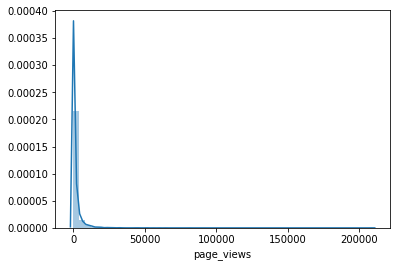

In [51]:
sns.distplot(resampled_data.page_views);

c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


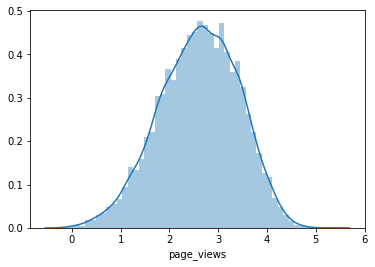

In [52]:
sns.distplot(np.log10(resampled_data.page_views));

In [53]:
# Pageviews are skewed so we'll take the log 

resampled_data['log10_page_views'] = np.log10(resampled_data.page_views)

c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


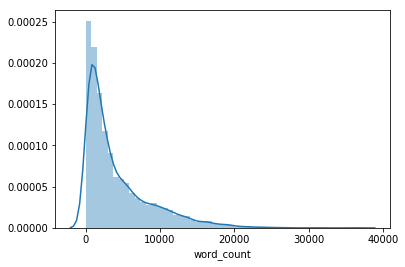

In [54]:
sns.distplot(resampled_data.word_count)

c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


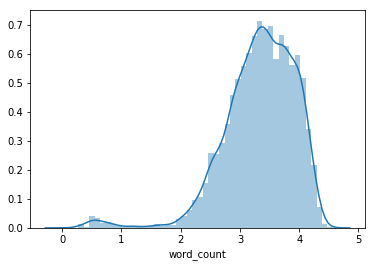

In [55]:
sns.distplot(np.log10(resampled_data.word_count))

It appears that articles with wordcoutns less than 10^3 outliers from the more gaussain response 

In [56]:
resampled_data = resampled_data[resampled_data.word_count > 10**2]

c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


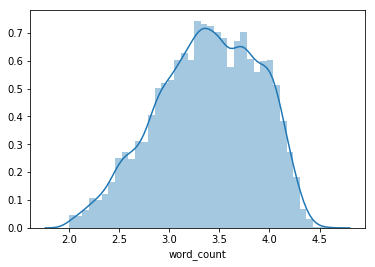

In [57]:
sns.distplot(np.log10(resampled_data.word_count))

In [58]:
resampled_data['log10_word_count'] = np.log10(resampled_data.word_count)

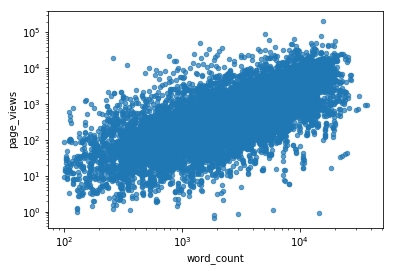

In [59]:
resampled_data.plot(x='word_count', y='page_views', loglog=True, kind='scatter', alpha=0.7)

c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


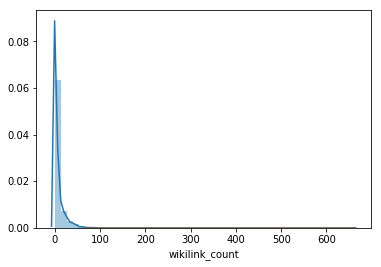

In [60]:
sns.distplot(resampled_data.wikilink_count)

c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


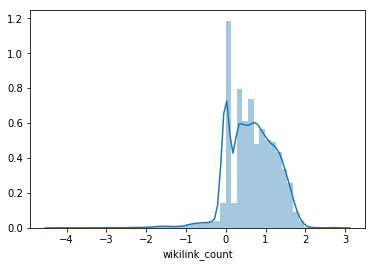

In [61]:
sns.distplot(np.log10(resampled_data[resampled_data.wikilink_count >0].wikilink_count))

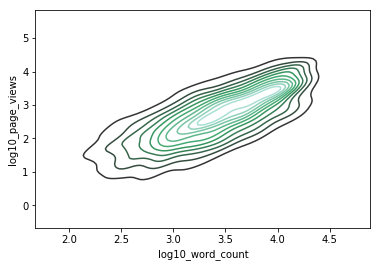

In [62]:
sns.kdeplot(data=resampled_data.log10_word_count, data2=resampled_data.log10_page_views)

# Using a regression model to infer important parameters

In [63]:
from sklearn import model_selection

In [64]:
train, test = model_selection.train_test_split(resampled_data.page_title.unique(), test_size=0.2)

train_data = resampled_data[resampled_data.page_title.isin(train)]
test_data = resampled_data[resampled_data.page_title.isin(test)]

In [66]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()

reg.fit(X=train_data[['external_link_count',
                         'heading_count', 'wikifile_count', 'wikilink_count',
                         'log10_word_count']], 
        y=train_data[['log10_page_views']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
prediction = reg.predict(test_data[['external_link_count', 'heading_count', 'wikifile_count', 'wikilink_count',
                                    'log10_word_count']])

In [68]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[ 1.38257844e-03 -4.10413515e-03  6.45113407e-04 -1.44627458e-03
   8.88913188e-01]]


In [69]:
print("Mean squared error: %.2f"
      % mean_squared_error(test_data.log10_page_views, prediction))

Mean squared error: 0.33


In [70]:
print('Variance score: %.2f' % r2_score(test_data.log10_page_views, prediction))

Variance score: 0.46


In [71]:
resampled_data['pageview_prediction'] = reg.predict(resampled_data[['external_link_count',
                                 'heading_count', 'wikifile_count', 'wikilink_count',
                                     'log10_word_count']])

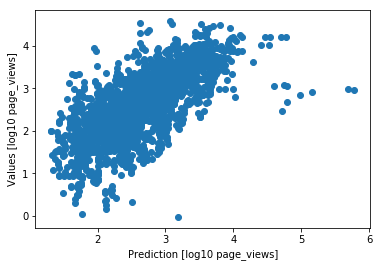

In [72]:
fig, ax = plt.subplots()
ax.scatter(x=np.array(prediction), y=np.array(test_data.log10_page_views))
ax.set_xlabel('Prediction [log10 page_views]');
ax.set_ylabel('Values [log10 page_views]');

In [73]:
reg = linear_model.LinearRegression()

reg.fit(X=train_data[['log10_word_count']], 
        y=train_data[['log10_page_views']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
prediction = reg.predict(test_data[['log10_word_count']])

In [75]:
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test_data.log10_page_views, prediction))
print('Variance score: %.2f' % r2_score(test_data.log10_page_views, prediction))

Coefficients: 
 [[1.12790612]]
Mean squared error: 0.35
Variance score: 0.43


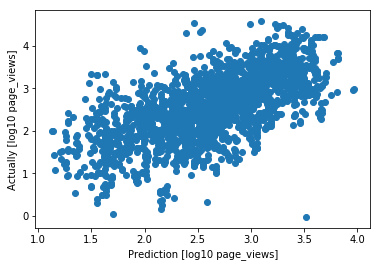

In [76]:
fig, ax = plt.subplots()
ax.scatter(x=np.array(prediction), y=np.array(test_data.log10_page_views))
ax.set_xlabel('Prediction [log10 page_views]');
ax.set_ylabel('Actually [log10 page_views]');

In [77]:
reg = linear_model.LinearRegression()

reg.fit(X=train_data[['log10_word_count', 'wikifile_count', 'wikilink_count']], 
        y=train_data[['log10_page_views']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
prediction = reg.predict(test_data[['log10_word_count', 'wikifile_count', 'wikilink_count']])

In [79]:
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test_data.log10_page_views, prediction))
print('Variance score: %.2f' % r2_score(test_data.log10_page_views, prediction))

Coefficients: 
 [[ 8.70588106e-01  8.83123260e-04 -5.95753415e-04]]
Mean squared error: 0.34
Variance score: 0.44


In summary of this anaylysis, the size of a page determines roughly 50% of the observed varience of our data when fit to a linear mondel. The inclusion of wikilinks and wikfiles marginally improves the explination of varience. 

I now wonder what causes these websites to grow? Was it a nascient popularity that encouraged users to edit the pages or something else. 

# Individual performance

There is only pointer data for the most current version of a page. Let's confirm that these trends hold for the just the most current data set

In [81]:
resampled_data.set_index('timestamp', inplace=True)

In [85]:
resampled_data_current_stats = resampled_data.loc['2018-12-31']

In [93]:
pages = set(resampled_data_current_stats.page_title) & set(pointer_data.page_title)

In [95]:
resampled_data_current_stats = resampled_data_current_stats[resampled_data_current_stats.page_title.isin(pages)]

In [96]:
train, test = model_selection.train_test_split(resampled_data_current_stats.page_title.unique(), test_size=0.2)

train_data = resampled_data_current_stats[resampled_data_current_stats.page_title.isin(train)]
test_data = resampled_data_current_stats[resampled_data_current_stats.page_title.isin(test)]

Coefficients: 
 [[1.15277308]]
Mean squared error: 0.28
Variance score: 0.56


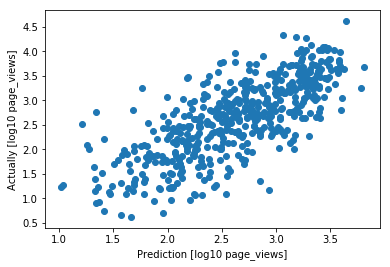

In [97]:
reg = linear_model.LinearRegression()

reg.fit(X=train_data[['log10_word_count']], 
        y=train_data[['log10_page_views']])

prediction = reg.predict(test_data[['log10_word_count']])

print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test_data.log10_page_views, prediction))
print('Variance score: %.2f' % r2_score(test_data.log10_page_views, prediction))

fig, ax = plt.subplots()
ax.scatter(x=np.array(prediction), y=np.array(test_data.log10_page_views))
ax.set_xlabel('Prediction [log10 page_views]');
ax.set_ylabel('Actually [log10 page_views]');

The trend holds

In [92]:
len(set(resampled_data_current_stats.page_title) & set(pointer_data.page_title))

2538

In [104]:
# Subsetting the pointer data to only include shared pages

pointer_data = pointer_data[pointer_data.page_title.isin(pages)]
pointer_data.set_index('page_title', inplace=True)

In [110]:
resampled_data_current_stats.reset_index(inplace=True)
resampled_data_current_stats.set_index(['page_title'], inplace=True)

In [115]:
resampled_data_current_stats = pd.concat([pointer_data, resampled_data_current_stats], axis=1)

In [117]:
resampled_data_current_stats

,Unnamed: 0,talk_link_count,wiki_link_count,wikipeida_count,user_count,timestamp,external_link_count,heading_count,page_views,wikifile_count,wikilink_count,word_count,log10_page_views,log10_word_count,pageview_prediction
page_title,,,,,,,,,,,,,,,
032c,12,59,252,0,0,2018-12-31,11.518519,4.000000,29.717813,42.703704,0.000000,682.592593,1.473017,2.834162,2.038533
100 Greatest Britons,13,59,252,0,0,2018-12-31,26.944444,5.555556,1542.102293,268.584362,9.880658,1762.876543,3.188113,3.246222,2.551190
108th United States Congress,14,118,504,0,0,2018-12-31,15.000000,133.000000,136.626102,1136.074074,3.000000,5723.222222,2.135534,3.757641,3.035814
109th United States Congress,15,118,504,0,0,2018-12-31,24.000000,134.000000,145.070547,1319.092593,4.111111,6968.740741,2.161579,3.843154,3.236628
12 Years a Slave (film),18,177,756,0,0,2018-12-31,101.000000,18.993827,3493.910053,290.896296,6.000000,5385.329012,3.543312,3.731212,3.049546
1804 Haiti massacre,19,59,252,0,0,2018-12-31,13.004115,10.000000,496.797178,56.524691,2.000000,1990.288066,2.696179,3.298916,2.435112
1900 Summer Olympics,23,236,1008,0,0,2018-12-31,37.527778,36.712963,534.610229,180.750000,14.000000,4794.796296,2.728037,3.680770,2.761603
1912 Triangular Tournament,24,59,252,0,0,2018-12-31,26.000000,18.000000,12.045855,124.888889,0.000000,1949.481481,1.080838,3.289919,2.459244
1962 English cricket season,26,59,252,0,0,2018-12-31,7.000000,12.000000,1.937390,57.000000,0.000000,614.777778,0.287217,2.788718,1.968280


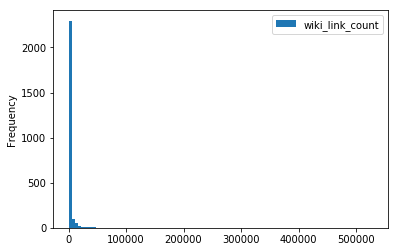

In [124]:
resampled_data_current_stats.plot(y=['wiki_link_count'], kind='hist', bins=100)

This appears skewed 

In [129]:
resampled_data_current_stats['log_wiki_link_count'] = np.log10(resampled_data_current_stats.wiki_link_count)

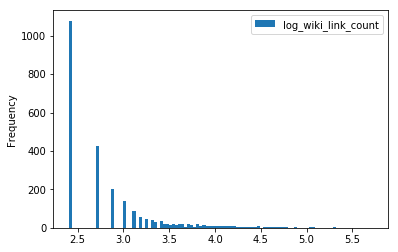

In [131]:
resampled_data_current_stats.plot(y=['log_wiki_link_count'], kind='hist', bins=100)

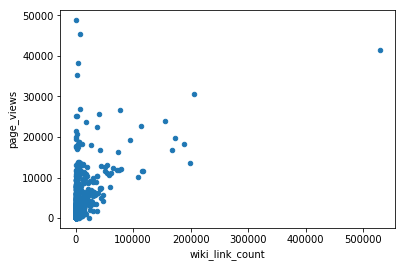

In [133]:
resampled_data_current_stats.plot(x='wiki_link_count', y='page_views', kind='scatter')

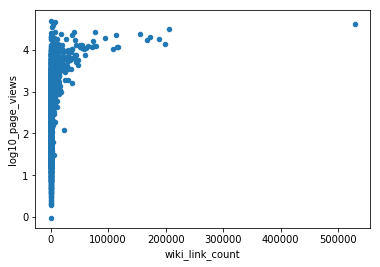

In [135]:
resampled_data_current_stats.plot(x='wiki_link_count', y='log10_page_views', kind='scatter')

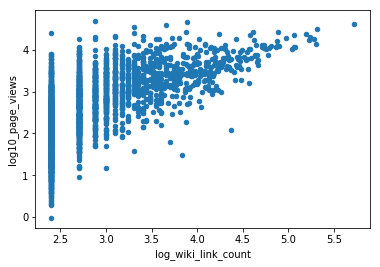

In [136]:
resampled_data_current_stats.plot(x='log_wiki_link_count', y='log10_page_views', kind='scatter')

In [138]:
resampled_data_current_stats.reset_index(inplace=True)

train, test = model_selection.train_test_split(resampled_data_current_stats.page_title.unique(), test_size=0.2)

train_data = resampled_data_current_stats[resampled_data_current_stats.page_title.isin(train)]
test_data = resampled_data_current_stats[resampled_data_current_stats.page_title.isin(test)]

Coefficients: 
 [[0.82599847 0.4790985 ]]
Mean squared error: 0.24
Variance score: 0.63


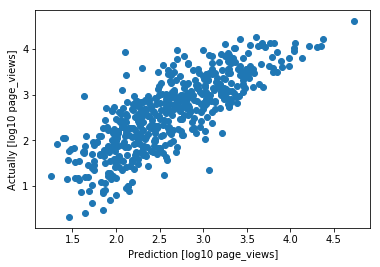

In [143]:
reg = linear_model.LinearRegression()

reg.fit(X=train_data[['log10_word_count', 'log_wiki_link_count']], 
        y=train_data[['log10_page_views']])

prediction = reg.predict(test_data[['log10_word_count', 'log_wiki_link_count']])

print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test_data.log10_page_views, prediction))
print('Variance score: %.2f' % r2_score(test_data.log10_page_views, prediction))

fig, ax = plt.subplots()
ax.scatter(x=np.array(prediction), y=np.array(test_data.log10_page_views))
ax.set_xlabel('Prediction [log10 page_views]');
ax.set_ylabel('Actually [log10 page_views]');

Coefficients: 
 [[1.15212087]]
Mean squared error: 0.29
Variance score: 0.56


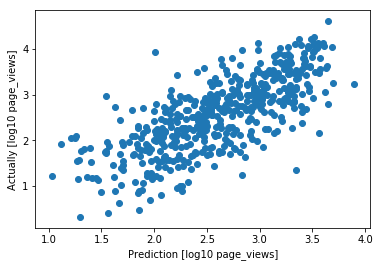

In [140]:
reg = linear_model.LinearRegression()

reg.fit(X=train_data[['log10_word_count']], 
        y=train_data[['log10_page_views']])

prediction = reg.predict(test_data[['log10_word_count']])

print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test_data.log10_page_views, prediction))
print('Variance score: %.2f' % r2_score(test_data.log10_page_views, prediction))

fig, ax = plt.subplots()
ax.scatter(x=np.array(prediction), y=np.array(test_data.log10_page_views))
ax.set_xlabel('Prediction [log10 page_views]');
ax.set_ylabel('Actually [log10 page_views]');

Coefficients: 
 [[-2.11362159e-03 -9.92322879e-05  7.60852176e-01  9.83995733e-04
   5.00800702e-01 -1.44588849e-05  0.00000000e+00]]
Mean squared error: 0.24
Variance score: 0.64


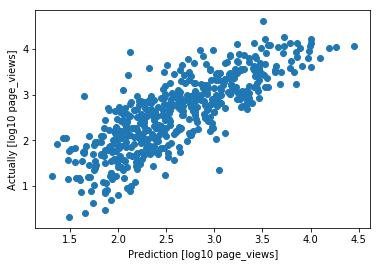

In [148]:
reg = linear_model.LinearRegression()

metrics = ['wikilink_count', 'wikifile_count', 'log10_word_count', 'external_link_count', 
           'log_wiki_link_count', 'talk_link_count','wikipeida_count']

reg.fit(X=train_data[metrics], 
        y=train_data[['log10_page_views']])

prediction = reg.predict(test_data[metrics])

print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test_data.log10_page_views, prediction))
print('Variance score: %.2f' % r2_score(test_data.log10_page_views, prediction))

fig, ax = plt.subplots()
ax.scatter(x=np.array(prediction), y=np.array(test_data.log10_page_views))
ax.set_xlabel('Prediction [log10 page_views]');
ax.set_ylabel('Actually [log10 page_views]');

In [144]:
train_data

,page_title,Unnamed: 0,talk_link_count,wiki_link_count,wikipeida_count,user_count,timestamp,external_link_count,heading_count,page_views,wikifile_count,wikilink_count,word_count,log10_page_views,log10_word_count,pageview_prediction,log_wiki_link_count
0,032c,12,59,252,0,0,2018-12-31,11.518519,4.000000,29.717813,42.703704,0.000000,682.592593,1.473017,2.834162,2.038533,2.401401
1,100 Greatest Britons,13,59,252,0,0,2018-12-31,26.944444,5.555556,1542.102293,268.584362,9.880658,1762.876543,3.188113,3.246222,2.551190,2.401401
2,108th United States Congress,14,118,504,0,0,2018-12-31,15.000000,133.000000,136.626102,1136.074074,3.000000,5723.222222,2.135534,3.757641,3.035814,2.702431
4,12 Years a Slave (film),18,177,756,0,0,2018-12-31,101.000000,18.993827,3493.910053,290.896296,6.000000,5385.329012,3.543312,3.731212,3.049546,2.878522
6,1900 Summer Olympics,23,236,1008,0,0,2018-12-31,37.527778,36.712963,534.610229,180.750000,14.000000,4794.796296,2.728037,3.680770,2.761603,3.003461
7,1912 Triangular Tournament,24,59,252,0,0,2018-12-31,26.000000,18.000000,12.045855,124.888889,0.000000,1949.481481,1.080838,3.289919,2.459244,2.401401
8,1962 English cricket season,26,59,252,0,0,2018-12-31,7.000000,12.000000,1.937390,57.000000,0.000000,614.777778,0.287217,2.788718,1.968280,2.401401
9,1963 English cricket season,27,59,252,0,0,2018-12-31,1.000000,10.000000,2.482011,45.518519,0.000000,374.592593,0.394804,2.573559,1.769528,2.401401
14,1984 MTV Video Music Awards,35,59,252,0,0,2018-12-31,6.000000,23.000000,45.455026,132.000000,0.000000,1402.000000,1.657582,3.146748,2.288393,2.401401
15,1987 Cricket World Cup,36,118,504,0,0,2018-12-31,33.000000,14.000000,314.012346,142.000000,0.000000,1048.703704,2.496947,3.020653,2.257023,2.702431


## Does an increase in page size cause an increase in page viewership?

In [101]:
combined_data.reset_index(inplace=True)
combined_data.set_index('timestamp', inplace=True)

resampled_data = combined_data[['page_title', 'character_count', 'external_link_count',
                   'heading_count', 'page_views',
                   'wikifile_count', 'wikilink_count', 'word_count']].groupby('page_title').resample('1d').mean()

# remove data that is mostly na

pages = [page for page, df in resampled_data.groupby('page_title') if df.character_count.isna().sum()>1100]

resampled_data = resampled_data.drop(pages, level=0)

# calculate std of values of interest
resampled_data.reset_index(inplace=True)
resampled_data.set_index('timestamp', inplace=True)
std_data = resampled_data[['page_title', 'external_link_count',
                                'heading_count', 'page_views',
                                'wikifile_count', 'wikilink_count', 'word_count']].groupby('page_title').resample('7d').std()


resampled_data.reset_index(inplace=True)
resampled_data.set_index('timestamp', inplace=True)
resampled_data = resampled_data[['page_title', 'character_count', 'external_link_count',
                   'heading_count', 'page_views',
                   'wikifile_count', 'wikilink_count', 'word_count']].groupby('page_title').resample('7d').mean()


resampled_data.reset_index(inplace=True)
resampled_data.set_index(['page_title', 'timestamp'], inplace=True)

resampled_data['page_views_std'] = std_data['page_views']

resampled_data.reset_index(inplace=True)

resampled_data.set_index('timestamp', inplace=True)
resampled_data = resampled_data.groupby('page_title').apply(lambda x: x.ffill())



In [103]:
resampled_data.reset_index(inplace=True)

In [104]:
resampled_data['word_count_delta'] = resampled_data.groupby('page_title')['word_count'].diff()
resampled_data['page_views_delta'] = resampled_data.groupby('page_title')['page_views'].diff()

In [106]:
resampled_data.dropna(inplace=True)

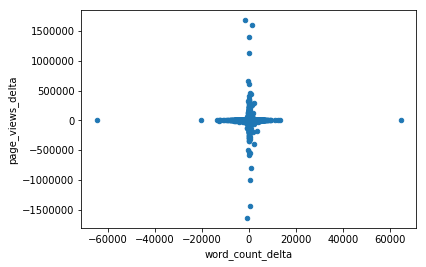

In [107]:
resampled_data.plot(x='word_count_delta', y='page_views_delta', kind='scatter')

(-1000, 1000)

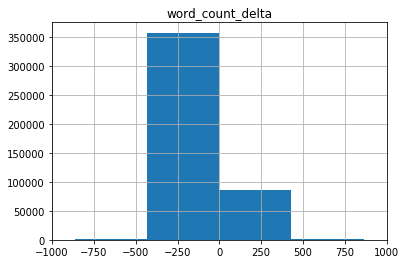

In [120]:
fig, ax = plt.subplots()
resampled_data.hist(column='word_count_delta', bins=300, ax=ax)
ax.set_xlim(-1000, 1000)

In [124]:
resampled_data = resampled_data[(resampled_data.word_count_delta < 750) &
                                (resampled_data.word_count_delta > -750) &
                                (resampled_data.page_views_delta < )]

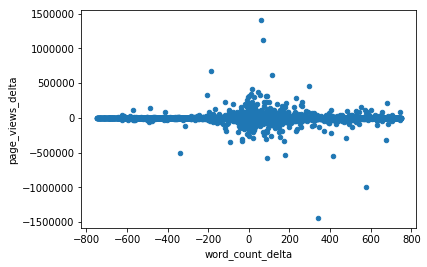

In [134]:
resampled_data.plot(x='word_count_delta', y='page_views_delta', kind='scatter')

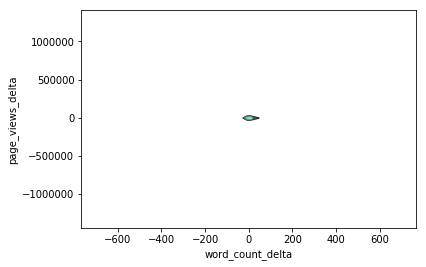

In [135]:
sns.kdeplot(data=resampled_data.word_count_delta, data2=resampled_data.page_views_delta )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7D645C978>],
      dtype=object)

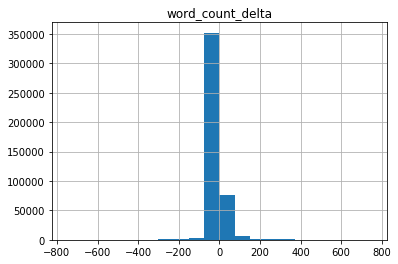

In [127]:
fig, ax = plt.subplots()
resampled_data.hist(column='word_count_delta', bins=20, ax=ax)
# ax.set_xlim(-1000, 1000)

(-250, 250)

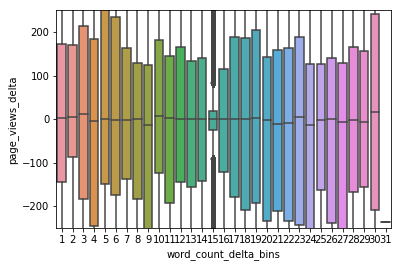

In [133]:
_, bins = np.histogram(resampled_data.word_count_delta, bins=30)
resampled_data['word_count_delta_bins'] = np.digitize(resampled_data.word_count_delta, bins=bins)

fig, ax = plt.subplots()

sns.boxplot(x='word_count_delta_bins', y='page_views_delta', data=resampled_data, ax = ax)
ax.set_ylim(-250, 250)

In [ ]:
resampled_data.word_count_delta

KeyboardInterrupt: 

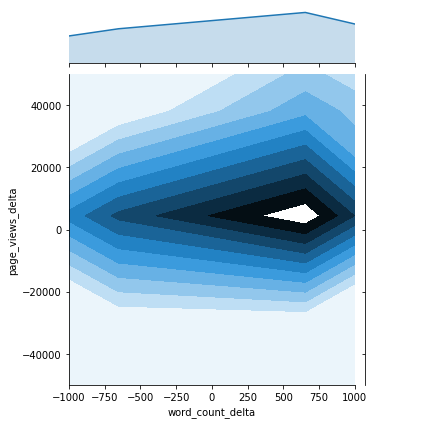

In [109]:
sns.jointplot(x=resampled_data.word_count_delta, y=resampled_data.page_views_delta, kind='kde', xlim=(-1000, 1000),
              ylim=(-50000, 50000) );


In [311]:
# resampled_data.reset_index(inplace=True)
reindexed_data = resampled_data.copy()
reindexed_data.timestamp = reindexed_data.timestamp + pd.to_timedelta(10, unit='D')

In [312]:
resampled_data.set_index(['page_title', 'timestamp'], inplace=True)

In [313]:
reindexed_data.set_index(['page_title', 'timestamp'], inplace=True)

In [314]:
reindexed_data = reindexed_data[['page_views', 'page_views_delta', 'word_count', 'word_count_delta']]
reindexed_data.columns = ['last_week_page_views', 'last_week_page_views_delta',  
                          'last_week_word_count', 'last_week_word_count_delta']

In [315]:
last_week_trends_data = pd.concat([resampled_data, reindexed_data], axis=1)

In [316]:
last_week_trends_data.dropna(inplace=True)

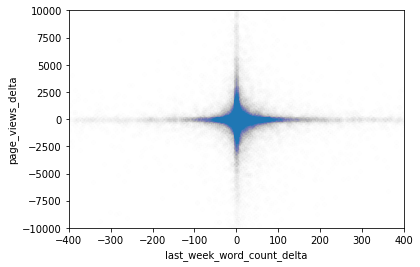

In [317]:
last_week_trends_data.plot(x='last_week_word_count_delta', y='page_views_delta', kind='scatter', alpha=0.005,
                          xlim=(-400, 400), ylim=(-10000, 10000))

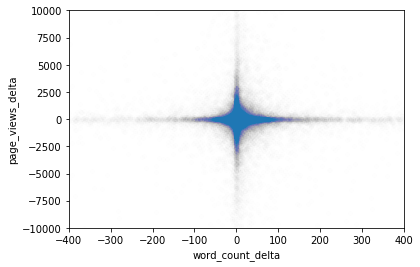

In [318]:
last_week_trends_data.plot(x='word_count_delta', y='page_views_delta', kind='scatter', alpha=0.005,
                          xlim=(-400, 400), ylim=(-10000, 10000))

In [319]:
# sns.jointplot(x=last_week_trends_data.last_week_word_count_delta, y=last_week_trends_data.page_views_delta, 
#               kind='kde', xlim=(-400, 400), ylim=(-20000, 20000));


In [320]:
# sns.jointplot(x=last_week_trends_data.word_count_delta, y=last_week_trends_data.page_views_delta, kind='kde', 
#               xlim=(-400, 400), ylim=(20000, -20000));

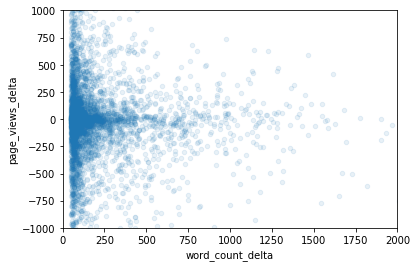

In [328]:
last_week_trends_data[last_week_trends_data.word_count_delta > 50].plot(x='word_count_delta', 
                                                                        y='page_views_delta', 
                                                                        kind='scatter', alpha=0.1, 
                                                                        xlim=(0, 2000), ylim=(-1000, 1000))

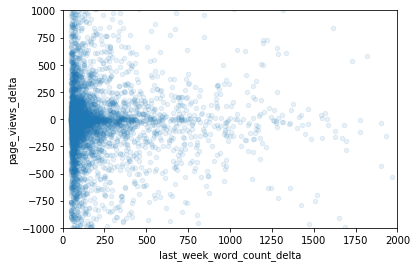

In [330]:
last_week_trends_data[last_week_trends_data.last_week_word_count_delta > 50].plot(x='last_week_word_count_delta', 
                                                                        y='page_views_delta', 
                                                                        kind='scatter', alpha=0.1, 
                                                                        xlim=(0, 2000), ylim=(-1000, 1000))

In [335]:
len(last_week_trends_data[(last_week_trends_data.last_week_word_count_delta > 50) &
                      (last_week_trends_data.page_views_delta > 0)])/len(last_week_trends_data[(last_week_trends_data.last_week_word_count_delta > 50)])

0.43242753623188407

In [336]:
len(last_week_trends_data[(last_week_trends_data.last_week_word_count_delta > 50) &
                          -(last_week_trends_data.page_views_delta > 0)])/len(last_week_trends_data[(last_week_trends_data.last_week_word_count_delta > 50)])

0.567572463768116

In [337]:
len(last_week_trends_data[(last_week_trends_data.word_count_delta > 50) &
                          (last_week_trends_data.page_views_delta > 0)])/len(last_week_trends_data[(last_week_trends_data.word_count_delta > 50)])

0.46946216955332726

In [178]:
pd.concat([resampled_data, reindexed_data])

c:\users\willi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,external_link_count,heading_count,index,last_week_page_views,last_week_page_views_delta,page_views,page_views_delta,page_views_std,wikifile_count,wikilink_count,word_count,word_count_delta
timestamp,,,,,,,,,,,,
2015-07-31,10.000000,4.0,1.0,NaN,NaN,13.375000,-2.261364,5.314314,19.531250,0.0,477.593750,1.593750
2015-08-30,10.000000,4.0,2.0,NaN,NaN,15.566667,2.191667,5.399127,20.000000,0.0,479.000000,1.406250
2015-09-29,10.000000,4.0,3.0,NaN,NaN,12.700000,-2.866667,4.579941,20.000000,0.0,479.000000,0.000000
2015-10-29,10.000000,4.0,4.0,NaN,NaN,15.833333,3.133333,5.843259,20.000000,0.0,479.000000,0.000000
2015-11-28,10.176471,4.0,5.0,NaN,NaN,15.882353,0.049020,5.623353,19.852941,0.0,479.411765,0.411765
2015-12-28,12.000000,4.0,6.0,NaN,NaN,13.533333,-2.349020,4.576803,19.000000,0.0,483.000000,3.588235
2016-01-27,12.000000,4.0,7.0,NaN,NaN,14.709677,1.176344,5.556939,20.806452,0.0,483.903226,0.903226
2016-02-26,12.000000,4.0,8.0,NaN,NaN,14.000000,-0.709677,4.417832,23.000000,0.0,485.000000,1.096774
2016-03-27,12.000000,4.0,9.0,NaN,NaN,12.666667,-1.333333,4.002873,23.000000,0.0,485.000000,0.000000


In [170]:
combined_data.dropna()

,,external_link_count,heading_count,index,last_week_page_views,last_week_page_views_delta,page_views,page_views_delta,page_views_std,wikifile_count,wikilink_count,word_count,word_count_delta
page_title,timestamp,,,,,,,,,,,,


In [59]:
for page, df in resampled_data.groupby('page_title'):
    

,page_title,timestamp,external_link_count,heading_count,page_views,wikifile_count,wikilink_count,word_count
1,032c,2015-07-08,10.000000,4.000000,21.000000,19.000000,0.0,476.000000
2,032c,2015-07-15,10.000000,4.000000,11.714286,19.000000,0.0,476.000000
3,032c,2015-07-22,10.000000,4.000000,14.857143,19.000000,0.0,476.000000
4,032c,2015-07-29,10.000000,4.000000,13.714286,19.000000,0.0,476.000000
5,032c,2015-08-05,10.000000,4.000000,10.285714,19.000000,0.0,476.000000
6,032c,2015-08-12,10.000000,4.000000,15.888889,19.666667,0.0,478.000000
7,032c,2015-08-19,10.000000,4.000000,12.428571,20.000000,0.0,479.000000
8,032c,2015-08-26,10.000000,4.000000,15.571429,20.000000,0.0,479.000000
9,032c,2015-09-02,10.000000,4.000000,16.428571,20.000000,0.0,479.000000
10,032c,2015-09-09,10.000000,4.000000,17.285714,20.000000,0.0,479.000000


In [ ]:
standard_deviation = combined_data[['page_views', 'page_title']].groupby('page_title').resample('1w').std()

In [243]:
resampled_data.dropna(inplace=True)

In [244]:
resampled_data

,page_title,timestamp,external_link_count,heading_count,page_views,wikifile_count,wikilink_count,word_count
1,032c,2015-07-12,10.000000,4.000000,20.900000,19.000000,0.0,476.000000
2,032c,2015-07-19,10.000000,4.000000,11.428571,19.000000,0.0,476.000000
3,032c,2015-07-26,10.000000,4.000000,14.428571,19.000000,0.0,476.000000
4,032c,2015-08-02,10.000000,4.000000,16.142857,19.000000,0.0,476.000000
5,032c,2015-08-09,10.000000,4.000000,10.000000,19.000000,0.0,476.000000
6,032c,2015-08-16,10.000000,4.000000,15.555556,19.444444,0.0,477.333333
7,032c,2015-08-23,10.000000,4.000000,11.428571,20.000000,0.0,479.000000
8,032c,2015-08-30,10.000000,4.000000,16.285714,20.000000,0.0,479.000000
9,032c,2015-09-06,10.000000,4.000000,15.714286,20.000000,0.0,479.000000
10,032c,2015-09-13,10.000000,4.000000,14.571429,20.000000,0.0,479.000000


## processing revision history 

We are going to make no attempt to filter the kind of revsions. Instead we are just going to look at the data that can be easily processed

## Stacking data on top of eachother

I want to combine pageview and revisions into one dataframe


In [66]:
filled_indexed_data = indexed_combined_data.fillna(method='ffill')

In [67]:
resampled_data = filled_indexed_data[['page_title', 'character_count', 'external_link_count',
                   'heading_count', 'page_views',
                   'wikifile_count', 'wikilink_count', 'word_count']].groupby('page_title').resample('7d').mean()

In [68]:
combined_data = pd.concat([revisions, resampled_data], axis=1)

# Plotting the data

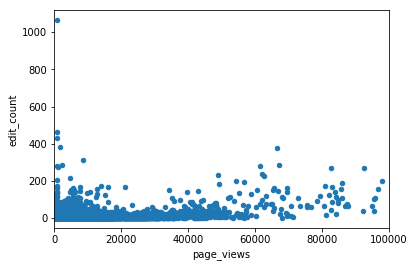

In [69]:
combined_data.plot(x='page_views', y='edit_count', kind='scatter', xlim=[0,100000])

In [70]:
# data_to_plot = combined_data[(combined_data.page_views < 10000) &
#                              (combined_data.edit_count < 200)]

# f, ax = plt.subplots(figsize=(6, 6))


# sns.kdeplot(data_to_plot.page_views, data_to_plot.edit_count, ax=ax)

# ax.set_ylim(0, 20)
# ax.set_xlim(0, 1000)

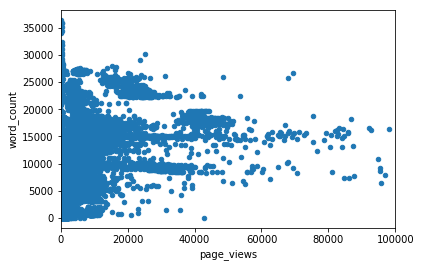

In [71]:
combined_data.plot(x='page_views', y='word_count', kind='scatter', xlim=[0,100000])

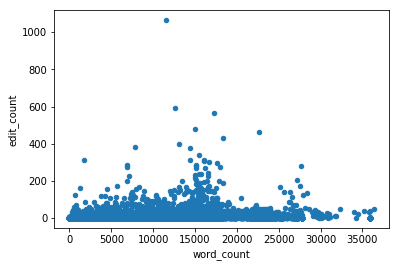

In [72]:
combined_data.plot(y='edit_count', x='word_count', kind='scatter')

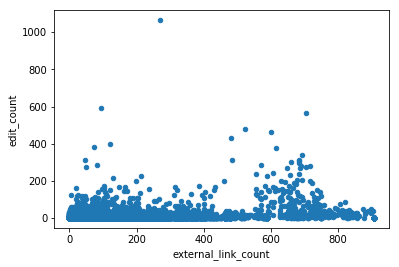

In [73]:
combined_data.plot(y='edit_count', x='external_link_count', kind='scatter')

Page views are all over the place. I need to establish some kind of moving window of pageviews, like a monthly average.

In [74]:
combined_data.reset_index(inplace=True)

In [75]:
combined_data = combined_data.set_index('timestamp')

In [78]:
sixtyone_days_pageviews = combined_data.groupby('page_title').page_views.rolling('70d').mean().to_frame('70d_averge_pageviews')

In [85]:
combined_data = combined_data.reset_index().set_index(['page_title', 'timestamp'])

In [87]:
combined_data = pd.concat([combined_data, sixtyone_days_pageviews], axis=1, join='inner')

In [89]:
combined_data['normalized_page_views'] = combined_data.page_views/combined_data['70d_averge_pageviews']

In [90]:
combined_data

edit_count  character_count  \
page_title              timestamp                                 
12 Years a Slave (film) 2015-07-01           6     32777.000000   
                        2015-07-08           2     32853.777778   
                        2015-07-15           8     32847.533333   
                        2015-07-22           2     32887.222222   
                        2015-07-29           5     32866.250000   
                        2015-08-05           1     32867.000000   
                        2015-08-12           1     32867.000000   
                        2015-08-19           4     32870.727273   
                        2015-08-26           5     32867.000000   
                        2015-09-02           3     32843.000000   
                        2015-09-09           0     32819.000000   
                        2015-09-16           0     32819.000000   
                        2015-09-23           1     32838.500000   
                        2015-09-30           3     32885.200000   
                        2015-10-07           3     32892.000000   
                        2015-10-14           0     32892.000000   
                        2015-10-21           0     32892.000000   
                        2015-10-28           6     32891.538462   
                        2015-11-04           0     32892.000000   
                        2015-11-11           7     33143.785714   
                        2015-11-18           5     33005.583333   
                        2015-11-25           0     32990.000000   
                        2015-12-02           7     33012.000000   
                        2015-12-09          17     31766.875000   
                        2015-12-16           2     30233.222222   
                        2015-12-23           1     30240.000000   
                        2015-12-30           7     30237.142857   
                        2016-01-06           6     30519.153846   
                        2016-01-13           4     31126.363636   
                        2016-01-20           2     31120.888889   
...                                        ...              ...   
war                     2017-12-06           2     51515.111111   
                        2017-12-13           0     51371.000000   
                        2017-12-20           3     51362.000000   
                        2017-12-27           0     51343.000000   
                        2018-01-03           2     51343.000000   
                        2018-01-10           0     51343.000000   
                        2018-01-17           0     51343.000000   
                        2018-01-24           0     51343.000000   
                        2018-01-31           0     51343.000000   
                        2018-02-07           1     51343.000000   
                        2018-02-14           2     51343.000000   
                        2018-02-21           0     51343.000000   
                        2018-02-28           1     51344.875000   
                        2018-03-07           0     51358.000000   
                        2018-03-14           0     51358.000000   
                        2018-03-21           1     51358.000000   
                        2018-03-28           0     51358.000000   
                        2018-04-04           1     51358.000000   
                        2018-04-11           0     51358.000000   
                        2018-04-18           3     51360.100000   
                        2018-04-25           1     51363.000000   
                        2018-05-02           0     51363.000000   
                        2018-05-09           4     51182.363636   
                        2018-05-16           2     50855.000000   
                        2018-05-23           0     50855.000000   
                        2018-05-30           0     50855.000000   
                        2018-06-06           0     50855.000000   
                

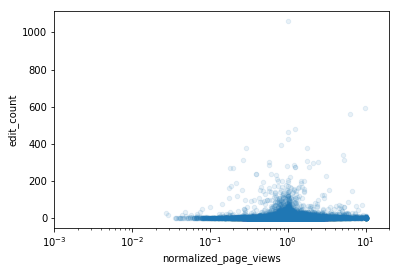

In [99]:
combined_data.plot(x='normalized_page_views', y='edit_count', kind='scatter', logx=True, xlim=[0.001, 20],
                     alpha=0.1)

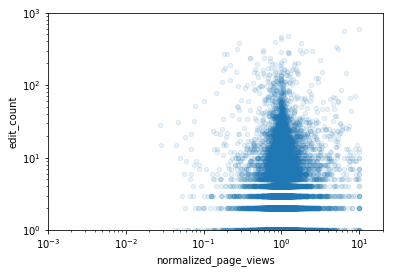

In [114]:
combined_data.plot(x='normalized_page_views', y='edit_count', kind='scatter', logx=True, logy=True, xlim=[0.001, 20],
                   ylim=[1, 1000],
                     alpha=0.1)

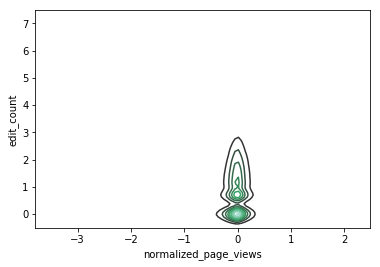

In [121]:
data_to_plot = combined_data[(combined_data.normalized_page_views != 0) &
                             (combined_data.edit_count != 0) &
                             (-combined_data.edit_count.isna()) &
                             (-combined_data.normalized_page_views.isna())]

sns.kdeplot(np.log(data_to_plot.normalized_page_views), np.log(data_to_plot.edit_count))

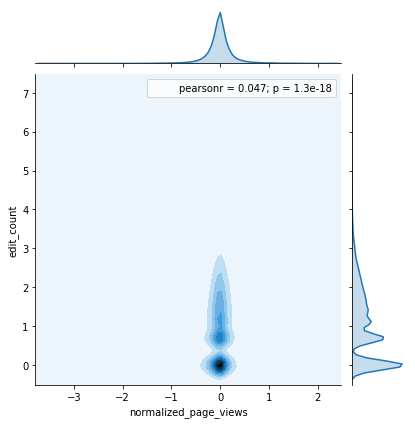

In [122]:
sns.jointplot(x=np.log(data_to_plot.normalized_page_views), y= np.log(data_to_plot.edit_count), kind="kde")

In [128]:
len(set(data_to_plot.index.get_level_values(0)))

692

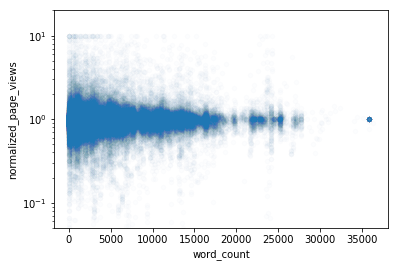

In [132]:
combined_data.plot(x='word_count', y='normalized_page_views', kind='scatter',alpha=0.01, 
                    logy=True, ylim=[0.05, 20],)

The above plot implies that large wikipedias have less varience in viewership. This would make sense especially if large wikpedias have signficantly more viewership.

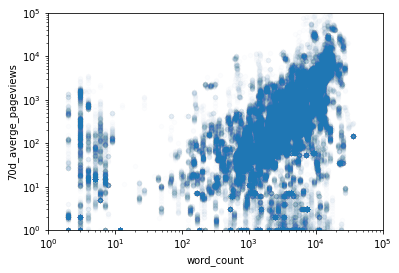

In [112]:
combined_data.plot(x='word_count', y='70d_averge_pageviews', kind='scatter', logy=True, logx=True, ylim=[1, 100000], 
                   xlim=[1, 100000], alpha=0.01)

Indeed there seems to be a trend between the size of a wikipedia article (number of words it contains) and the average pageviews.

# quick look at rates of growth

I'm going to quickly try to identify if these metrics coorelate to the rate of growth of a wikipedia page

In [134]:
combined_data = combined_data.reset_index()

In [135]:
combined_data

,page_title,timestamp,edit_count,character_count,external_link_count,heading_count,page_views,wikifile_count,wikilink_count,word_count,70d_averge_pageviews,normalized_page_views
0,12 Years a Slave (film),2015-07-01,6,32777.000000,93.833333,18.000000,4060.615385,291.333333,6.0,5307.333333,4060.615385,1.000000
1,12 Years a Slave (film),2015-07-08,2,32853.777778,94.000000,18.000000,4346.111111,291.000000,6.0,5321.888889,4203.363248,1.033960
2,12 Years a Slave (film),2015-07-15,8,32847.533333,94.000000,18.000000,4705.333333,291.133333,6.0,5321.133333,4370.686610,1.076566
3,12 Years a Slave (film),2015-07-22,2,32887.222222,94.000000,18.000000,4630.555556,289.888889,6.0,5330.666667,4435.653846,1.043940
4,12 Years a Slave (film),2015-07-29,5,32866.250000,94.000000,18.000000,4046.916667,289.083333,6.0,5328.916667,4357.906410,0.928638
5,12 Years a Slave (film),2015-08-05,1,32867.000000,94.000000,18.000000,3837.500000,289.000000,6.0,5329.000000,4271.172009,0.898465
6,12 Years a Slave (film),2015-08-12,1,32867.000000,94.000000,18.000000,4010.750000,289.000000,6.0,5329.000000,4233.968864,0.947279
7,12 Years a Slave (film),2015-08-19,4,32870.727273,94.000000,18.000000,4004.727273,289.090909,6.0,5329.454545,4205.313666,0.952302
8,12 Years a Slave (film),2015-08-26,5,32867.000000,94.000000,18.000000,4043.166667,289.000000,6.0,5329.000000,4187.297332,0.965579
9,12 Years a Slave (film),2015-09-02,3,32843.000000,94.000000,18.000000,3771.800000,289.000000,6.0,5325.000000,4145.747599,0.909800


In [139]:
combined_data.groupby('page_title').apply(lambda x: pd.Series(np.gradient(x.word_count), 
                                                                         x.timestamp, name='slope'))



timestamp,2015-07-01 00:00:00,2015-07-08 00:00:00,2015-07-15 00:00:00,2015-07-22 00:00:00,2015-07-29 00:00:00,2015-08-05 00:00:00,2015-08-12 00:00:00,2015-08-19 00:00:00,2015-08-26 00:00:00,2015-09-02 00:00:00,...,2018-04-25 00:00:00,2018-05-02 00:00:00,2018-05-09 00:00:00,2018-05-16 00:00:00,2018-05-23 00:00:00,2018-05-30 00:00:00,2018-06-06 00:00:00,2018-06-13 00:00:00,2018-06-20 00:00:00,2018-06-27 00:00:00
page_title,,,,,,,,,,,,,,,,,,,,,
12 Years a Slave (film),14.555556,6.900000,4.388889,3.891667,-0.833333,0.041667,0.227273,0.000000,-2.227273,-4.000000,...,-3.438725,17.343750,0.465241,3.000000,4.056818,0.500000,-0.375000,-2.500000,-18.000000,-31.000000
1804 Haiti massacre,-3238.900000,-1800.000000,-124.550000,150.205882,69.681818,-27.705882,-3.181818,0.000000,5.444444,25.472222,...,0.000000,0.000000,0.133333,0.000000,2.787719,3.500000,0.578947,1.444444,0.000000,-2.888889
1862 congressional elections,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-124.187500,-993.500000,-869.312500,0.000000,0.000000,0.000000,0.000000
3M,2020.666667,1010.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,1.500000,...,0.000000,4.950000,50.000000,48.550000,3.181818,-3.500000,-3.181818,0.000000,0.000000,0.000000
3M Performance 400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-518.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3M Separation and Purification Solutions,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3M bookshelf game series,0.000000,0.000000,0.000000,0.000000,175.437500,200.500000,25.062500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"75,000 volunteers",-113.750000,-56.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abraham Lincoln,3246.600000,1623.300000,0.000000,0.000000,0.000000,0.150000,-0.150000,11.450000,25.111538,11.900000,...,29.940559,14.136364,8.269697,272.663636,1.922222,-262.168421,5.555556,4.118421,7.888889,2.500000


In [142]:
np.gradient(combined_data[combined_data.page_title == '12 Years a Slave (film)'].word_count)

array([ 1.45555556e+01,  6.90000000e+00,  4.38888889e+00,  3.89166667e+00,
       -8.33333333e-01,  4.16666667e-02,  2.27272727e-01,  0.00000000e+00,
       -2.22727273e+00, -4.00000000e+00, -2.00000000e+00,  1.00000000e+00,
        4.00000000e+00,  3.50000000e+00,  5.00000000e-01,  0.00000000e+00,
       -3.84615385e-02,  0.00000000e+00,  2.02884615e+01,  8.12500000e+00,
       -1.32500000e+01, -5.35714286e-02, -1.00062500e+02, -2.26404762e+02,
       -1.24937500e+02,  2.26190476e-01,  2.38076923e+01,  7.27435065e+01,
        4.86923077e+01, -1.36363636e-01,  0.00000000e+00, -1.13636364e-01,
        2.22222222e-01, -3.34801136e+01, -8.88888889e+00,  2.50937500e+01,
        1.66666667e-01,  0.00000000e+00,  4.64285714e-01, -2.94117647e-01,
       -7.14285714e-01,  1.73856209e+00,  2.50000000e-01, -1.94444444e+00,
       -5.00000000e-01,  3.18181818e+00,  5.00000000e+00,  1.81818182e+00,
        5.55555556e-02,  0.00000000e+00,  3.78582375e+01,  4.86153846e+01,
        1.37920892e+01,  

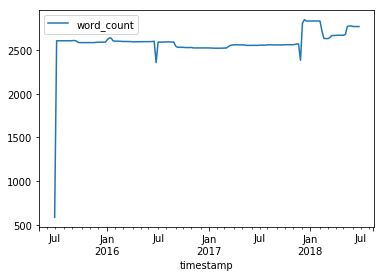

In [149]:
combined_data[combined_data.page_title == '3M'].plot(x='timestamp', y='word_count')

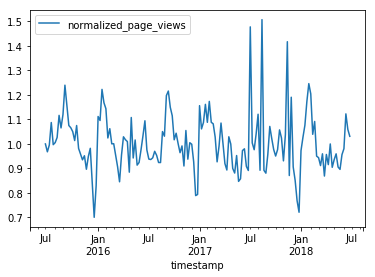

In [150]:
combined_data[combined_data.page_title == '3M'].plot(x='timestamp', y='normalized_page_views')

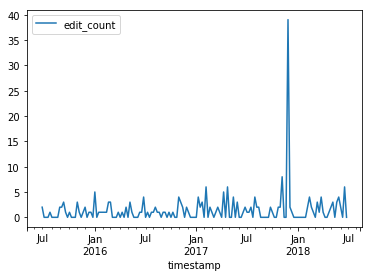

In [151]:
combined_data[combined_data.page_title == '3M'].plot(x='timestamp', y='edit_count')